In [118]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

# Import Library for splitting data
from sklearn.model_selection import train_test_split

# Import Library for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree

from sklearn.inspection import DecisionBoundaryDisplay

Iris Dataset
---
The data set is stored in a 150x4 ndarray.  
Each row (iris) is described by four features (Sepal Length, Sepal Width, Petal Length and Petal Width). 
It has three different types of irises (Setosa, Versicolour, and Virginica). 

In [119]:
# Reading the Iris.csv file
iris_ds = load_iris()

# Extracting Attributes / Features
X = iris_ds.data[:, :2] #iris_ds.data

# Extracting Target / Class Labels
y = iris_ds.target

# Creating Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.25)

print(X_train.shape)
print(X[:5])
print(y_train.shape)
print(y_train[:5])

(112, 2)
[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]
(112,)
[1 0 0 1 2]


In [120]:
# Creating Decision Tree Classifier
#decision_tree = DecisionTreeClassifier(criterion='entropy')
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

# Predicting the class labels for Test Data
y_pred = clf.predict(X_test)

# Accuracy Score
print("Train data accuracy:", accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:", accuracy_score(y_true = y_test, y_pred=y_pred))

confusion_matrix(y_true = y_test, y_pred=y_pred)

Train data accuracy: 0.9553571428571429
Test data accuracy: 0.7105263157894737


array([[9, 2, 0],
       [0, 9, 6],
       [0, 3, 9]], dtype=int64)

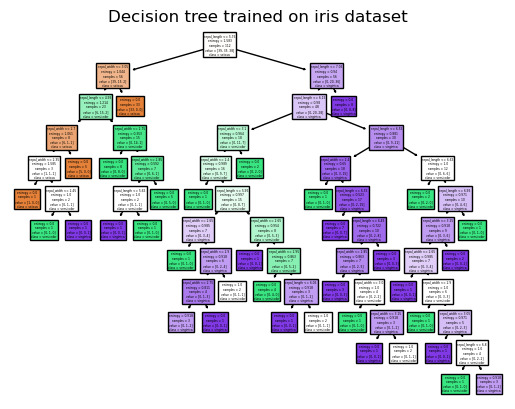

In [121]:
# Plotting the Decision Tree
plt.figure()
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plot_tree(clf, filled=True, feature_names=col_names, class_names=iris_ds.target_names)
plt.title("Decision tree trained on iris dataset")
plt.show()